In [224]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy, pandas, matplotlib & seaborn packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

# read data
df = pd.read_csv("./Uber Request Data.csv")

In [225]:
# Data Inspection
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


(6745, 6)

In [226]:
# Check for nulls
dfnull = df.isnull().sum(axis=1)
df.tail(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6735,6737,Airport,NaN,No Cars Available,15-07-2016 23:39:15,NaN
6736,6744,Airport,NaN,No Cars Available,15-07-2016 23:42:51,NaN
6737,6740,City,NaN,No Cars Available,15-07-2016 23:43:54,NaN
6738,6746,City,NaN,No Cars Available,15-07-2016 23:46:03,NaN
6739,6739,City,NaN,No Cars Available,15-07-2016 23:46:20,NaN
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [227]:
#Null values are valid as the trip is cancelled
# Convert Date columns into standard Date Time format

df['Request timestamp'] = df['Request timestamp'].astype('datetime64[ns]')
df['Drop timestamp'] = df['Drop timestamp'].astype('datetime64[ns]')
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


In [158]:
# Check the date time conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [228]:
#Create derived columns to extract hour, day, weekday & count
df['hour'] = df['Request timestamp'].map( lambda x: x.hour )
df['day'] = df['Request timestamp'].map( lambda x: x.day )
df['weekday'] = df['Request timestamp'].map( lambda x: x.weekday_name )
df['Count']=1
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,day,weekday,Count
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Monday,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Monday,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Wednesday,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Wednesday,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Wednesday,1
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Wednesday,1
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Thursday,1
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Friday,1
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Friday,1
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7,Monday,1


In [230]:
# Slicing the time of the day
def time_slicer(x):
    #Slice the time of the day into five categories
    if x < 6:
        return "Early_Morning"
    elif 6 <= x < 10:
        return "Peak_Morning"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Peak_Evening"
    else:
        return "Night_Time"

df['time_day'] = df.hour.apply(lambda x: time_slicer(x))

# Demand vs Gap
def demand_gap(x):
    if x == "Trip Completed":
        return "Completed"
    else:
        return "Cancelled"

df['dg'] = df.Status.apply(lambda x: demand_gap(x))
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,day,weekday,Count,time_day,dg
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Monday,1,Day_Time,Completed
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Monday,1,Peak_Evening,Completed
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Wednesday,1,Peak_Morning,Completed
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Wednesday,1,Peak_Evening,Completed
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Wednesday,1,Peak_Morning,Completed
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Wednesday,1,Peak_Evening,Completed
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Thursday,1,Peak_Morning,Completed
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Friday,1,Early_Morning,Completed
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Friday,1,Peak_Evening,Completed
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7,Monday,1,Peak_Morning,Completed


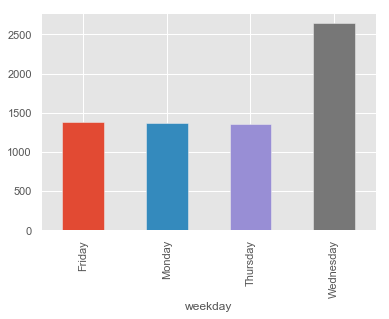

In [233]:
#create plot to check if the the chart shows any meaningful insights
weekday_df = df.groupby('weekday')['Count'].sum()
matplotlib.style.use('ggplot')
weekday_df.plot.bar(x='Weekday', y='Count')

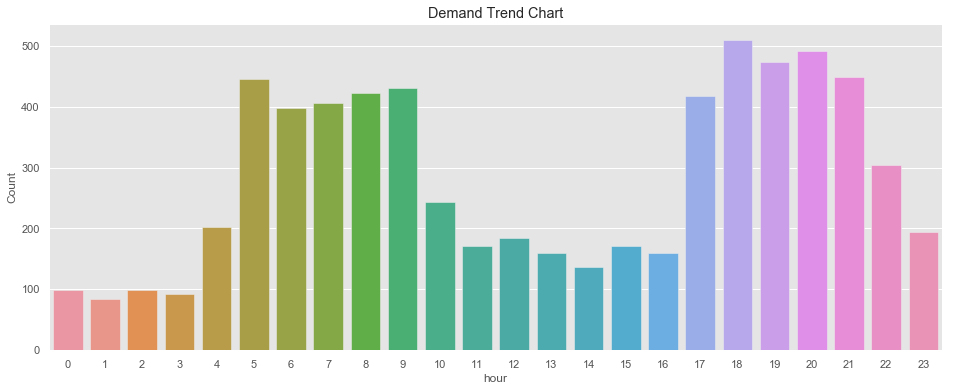

In [234]:
#since weekday chart has no meaningful data create additional charts to analyse the demand of the service
plt.figure(figsize=(16, 6))
plt.title("Demand Trend Chart")
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
sns.barplot(x = "hour",y = "Count", data = df, estimator=np.sum)

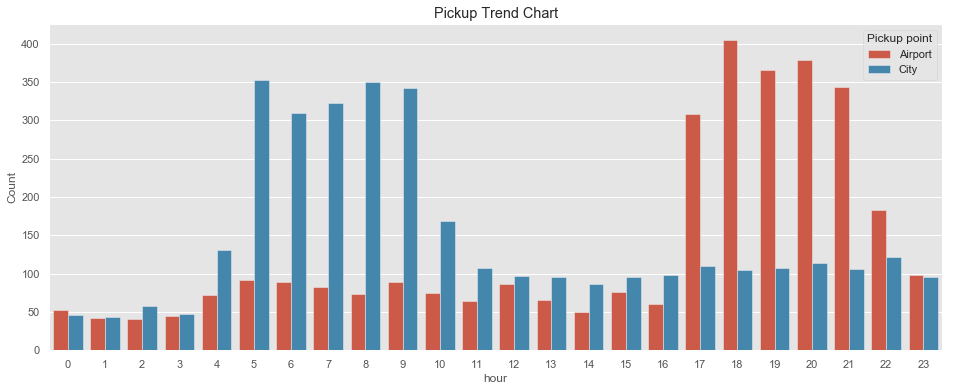

In [235]:
#Plot chart to check hour-eise trend of demand from different pickup points
plt.figure(figsize=(16, 6))
plt.title("Pickup Trend Chart")
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
sns.barplot(x = "hour",y = "Count", hue = "Pickup point", data = df, estimator=np.sum)

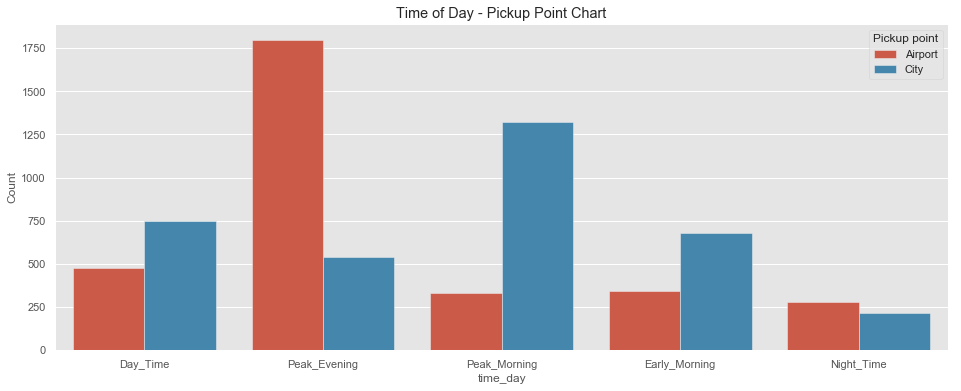

In [236]:
#Plot chart to check trend of demand during the day from different pickup points
plt.figure(figsize=(16, 6))
plt.title("Time of Day - Pickup Point Chart")
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
sns.barplot(x = "time_day",y="Count", hue = "Pickup point", data = df, estimator=np.sum)

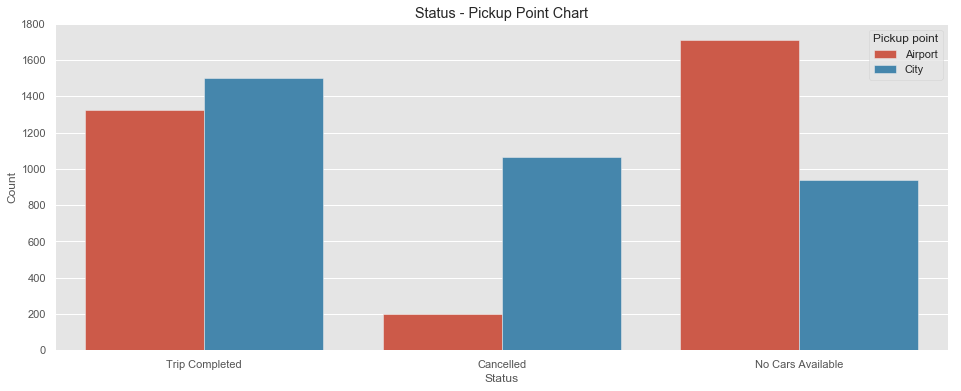

In [237]:
#Plot chart to status of demand from different pickup points
plt.figure(figsize=(16, 6))
plt.title("Status - Pickup Point Chart")
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
sns.barplot(x = "Status",y="Count", hue = "Pickup point", data = df, estimator=np.sum)

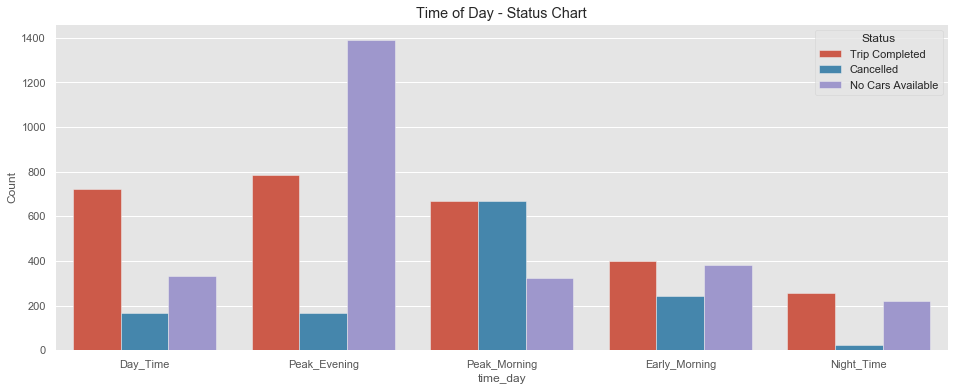

In [238]:
#Plot chart to check status of demand from during the day
plt.figure(figsize=(16, 6))
plt.title("Time of Day - Status Chart")
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
sns.barplot(x = "time_day",y="Count", hue = "Status", data = df, estimator=np.sum)

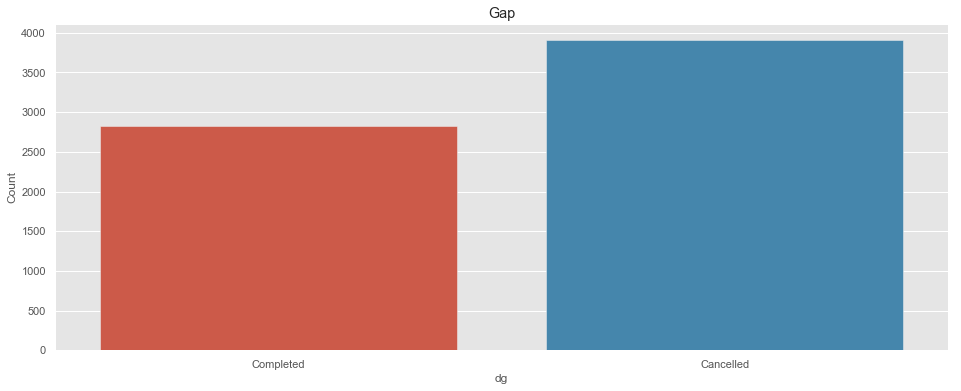

In [239]:
#Plot chart to check the demand vs gap
plt.figure(figsize=(16, 6))
plt.title("Gap")
plt.xlabel("Demand vs Gap")
plt.ylabel("Number of Requests")
sns.barplot(x = "dg",y="Count", data = df, estimator=np.sum)